In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\asus\CareerFoundry\CareerFoundry Acheivement 6'

In [4]:
rgs = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'All_rgs.csv'), index_col = 0)

In [5]:
rgs.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,scorer,minute,own_goal,penalty,winner,first_shooter,match_time
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rgs_sub = rgs[['home_score','away_score', 'neutral', 'minute']]

In [7]:
rgs_sub.head()

,home_score,away_score,neutral,minute
0,0,0,False,NaN
1,4,2,False,NaN
2,2,1,False,NaN
3,2,2,False,NaN
4,3,0,False,NaN


In [8]:
rgs_sub.corr()

,home_score,away_score,neutral,minute
home_score,1.000000,-0.255681,-0.058297,-0.011529
away_score,-0.255681,1.000000,0.117689,0.003004
neutral,-0.058297,0.117689,1.000000,0.014767
minute,-0.011529,0.003004,0.014767,1.000000


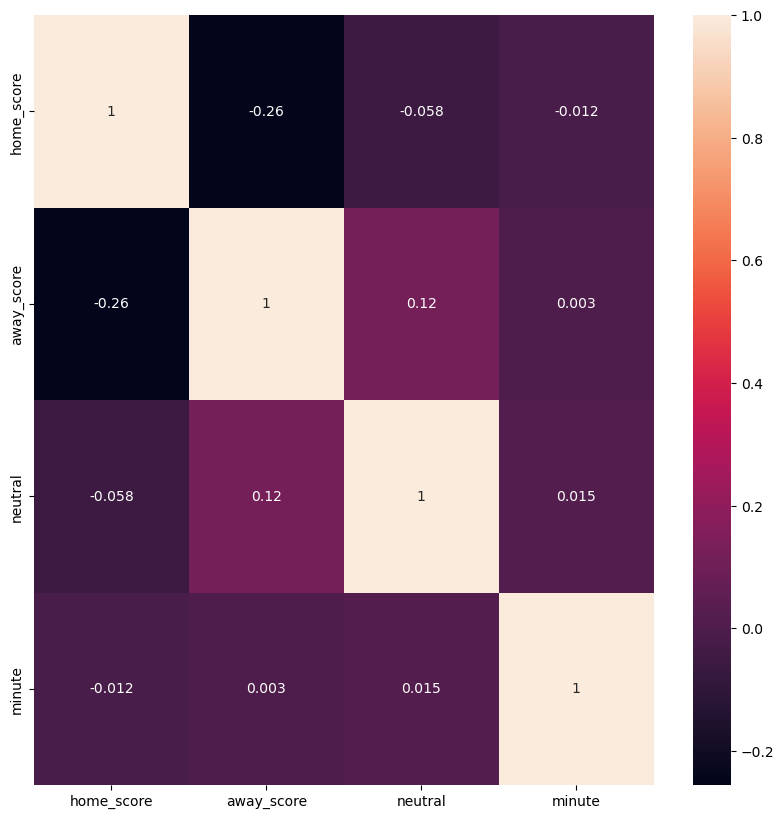

In [9]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(rgs_sub.corr(), annot = True, ax = ax)

# ? ^

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


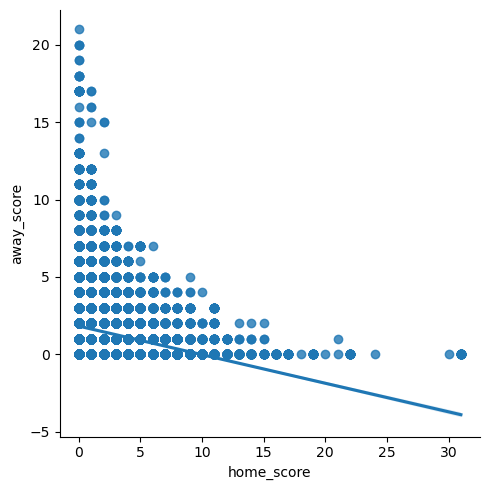

In [10]:
scatr_h_a = sns.lmplot(x = 'home_score', y = 'away_score', data = rgs)

In [11]:
scatr_h_a.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_home_away.png'))

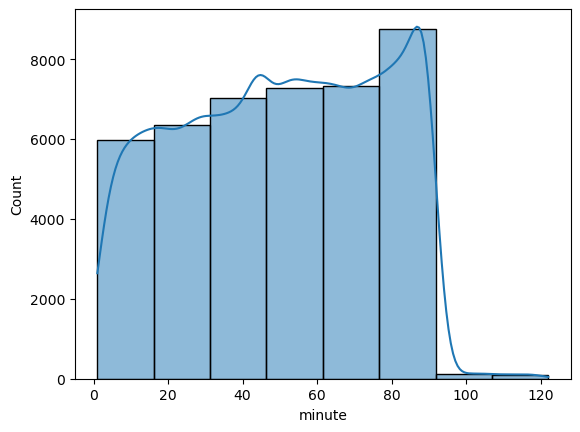

In [12]:
hist_goalm = sns.histplot(rgs['minute'], bins = 8,kde = True)

In [13]:
hist_goalm.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_goal_minute.png'))

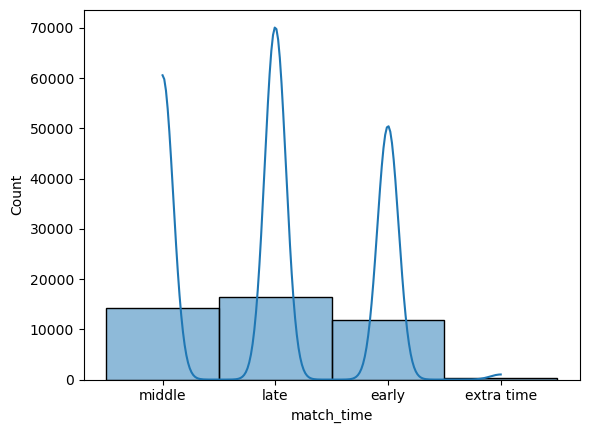

In [14]:
hist_goalt = sns.histplot(rgs['match_time'], kde = True)

In [15]:
hist_goalt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_goal_time.png'))

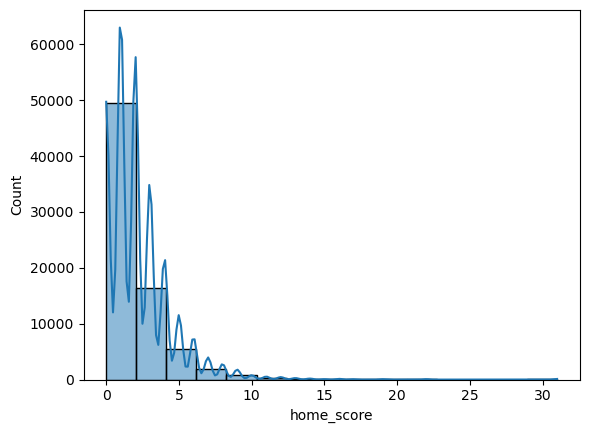

In [16]:
hist_homeg = sns.histplot(rgs['home_score'], bins = 15, kde = True)

In [17]:
hist_homeg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_home_goal.png'))

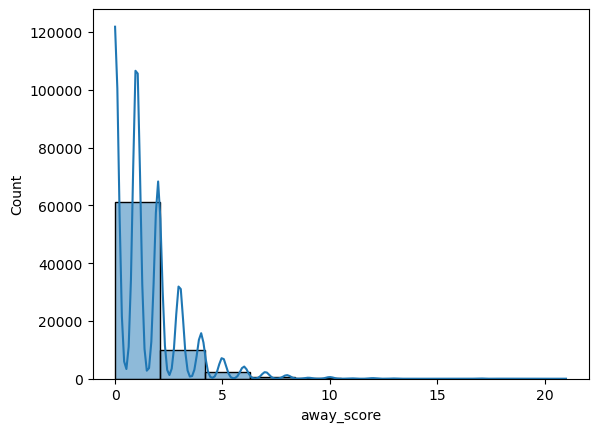

In [18]:
hist_awayg = sns.histplot(rgs['away_score'], bins = 10, kde = True)

In [19]:
hist_awayg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_away_goal.png'))

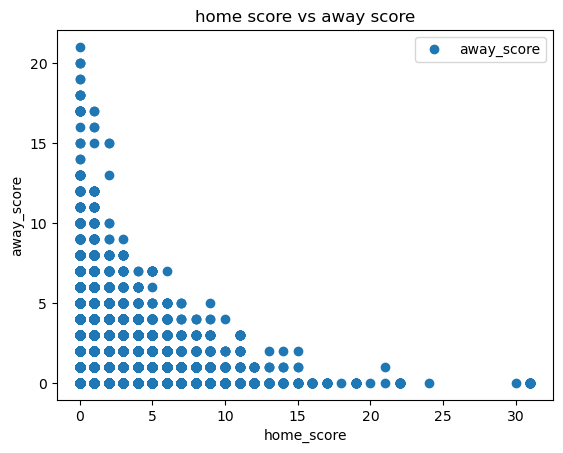

In [20]:
rgs.plot(x = 'home_score', y='away_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('home score vs away score')  
plt.xlabel('home_score')  
plt.ylabel('away_score')  
plt.show()

In [ ]:
plt.savefig('image.png')

# ? ^

In [31]:
X = rgs['home_score'].values.reshape(-1,1)
y = rgs['away_score'].values.reshape(-1,1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
regression = LinearRegression() 

In [36]:
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
y_predicted = regression.predict(X_test)

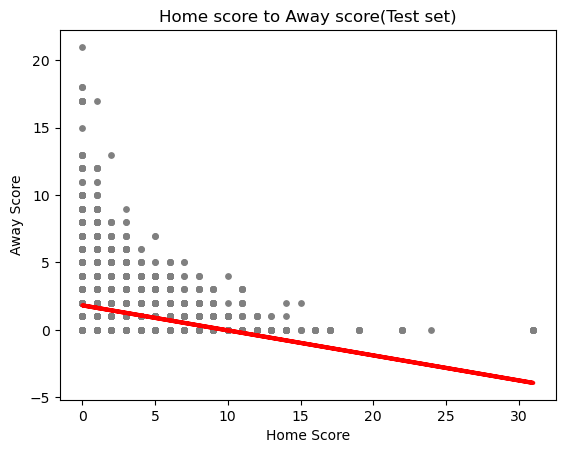

In [38]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Home score to Away score(Test set)')
plot_test.xlabel('Home Score')
plot_test.ylabel('Away Score')
plot_test.show()

In [39]:
#model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.18573726]]
Mean squared error:  2.4465233617750917
R2 score:  0.06420086144789616


In [ ]:
# Root Mean Squared Error = estimator that measures avg of the squared diff. between estimated values and true values
# r-squared value (R2 score) = tells you how well the model explains the variance in the data

In [41]:
# comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,1,1.631221
1,0,1.816958
2,1,1.445483
3,2,0.702534
4,0,1.259746
5,1,1.074009
6,2,1.816958
7,0,0.702534
8,1,1.445483
9,3,1.816958


# ? ^

In [46]:
rgs_short = rgs[['home_score', 'away_score']]

In [44]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [47]:
score = [kmeans[i].fit(rgs_short).score(rgs_short) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[-559413.9710673793,
 -338192.9195765163,
 -232222.16024708765,
 -170853.25355735703,
 -140804.78593309916,
 -116930.03256167576,
 -100061.00201346587,
 -85492.54660539477,
 -77401.00815785646]

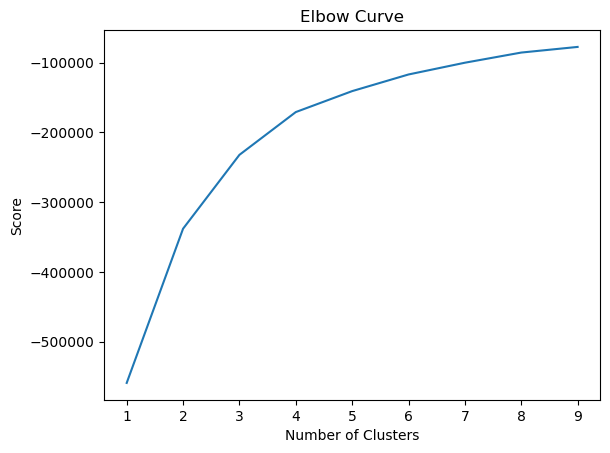

In [48]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [49]:
kmeans = KMeans(n_clusters = 3) 

In [50]:
kmeans.fit(rgs_short)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [51]:
rgs_short['clusters'] = kmeans.fit_predict(rgs_short)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\AppData\Local\Temp\ipykernel_300\2210830196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rgs_short['clusters'] = kmeans.fit_predict(rgs_short)


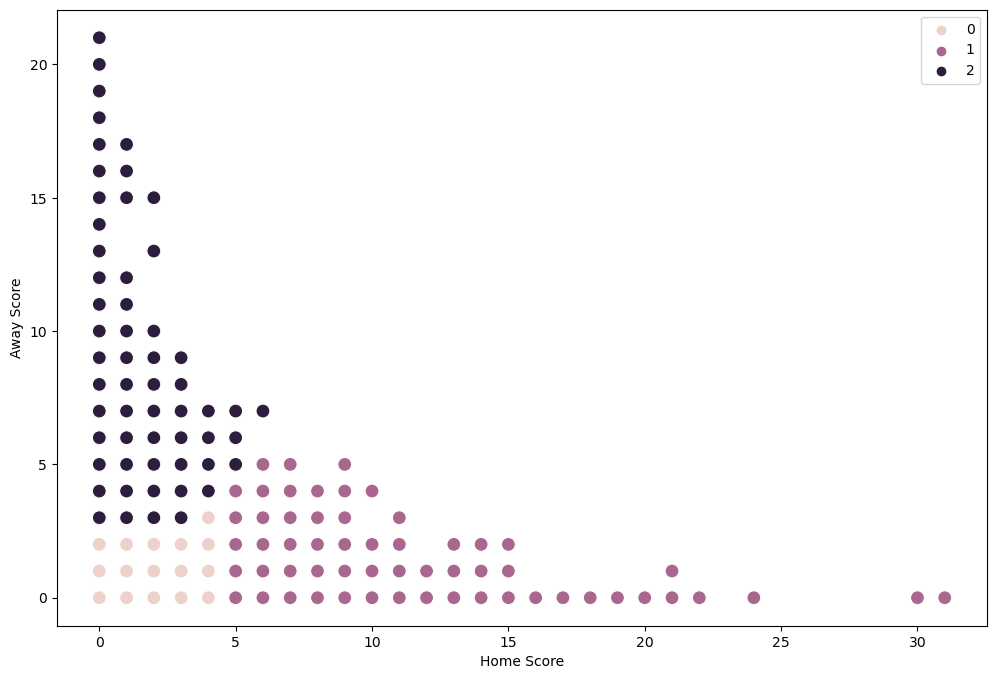

In [52]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=rgs_short['home_score'], y=rgs_short['away_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Home Score') # Label x-axis.
plt.ylabel('Away Score') # Label y-axis.
plt.show()

# ?^

In [53]:
rgs_short.loc[rgs_short['clusters'] == 0, 'cluster'] = 'tan'
rgs_short.loc[rgs_short['clusters'] == 1, 'cluster'] = 'purple'
rgs_short.loc[rgs_short['clusters'] == 2, 'cluster'] = 'darkest purple'

C:\Users\asus\AppData\Local\Temp\ipykernel_300\1000980137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rgs_short.loc[rgs_short['clusters'] == 0, 'cluster'] = 'tan'


In [54]:
rgs_short.groupby('cluster').agg({'home_score':['mean', 'median'], 
                         'away_score':['mean', 'median']})

home_score        away_score       
                     mean median       mean median
cluster                                           
darkest purple   1.085028    1.0   4.145649    4.0
purple           6.760461    6.0   0.610951    0.0
tan              1.756275    2.0   0.890631    1.0